In [3]:
from sklearn.datasets import fetch_california_housing #이미 있는 데이터셋 
import pandas as pd
import numpy as np

california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

data = data[['MedInc', 'MedHouseVal']]

In [4]:
data

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [5]:
np.random.seed(42)
missing_rate = 0.1 #결측치 10%
n_ms_sample = int(np.floor(missing_rate*data.shape[0]))


missing_samples = np.random.choice(data.index, n_ms_sample, replace=False)
data_missing = data.copy()
data_missing.loc[missing_samples, 'MedInc' ] = np.nan

In [6]:
data_missing

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,NaN,3.413
4,3.8462,3.422
...,...,...
20635,NaN,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


fillna(method = 'bfill')
fillna(method = 'ffill')
interpolate(method = ")

In [7]:
data_missing.loc[:10,]

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,NaN,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [8]:
data_missing.loc[:10,].fillna(method='bfill')

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,3.8462,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [9]:
data_missing.loc[:10,].fillna(method='ffill')

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,7.2574,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [10]:
data_missing.loc[:10,].interpolate()

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.5518,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


<AxesSubplot:xlabel='MedInc', ylabel='Count'>

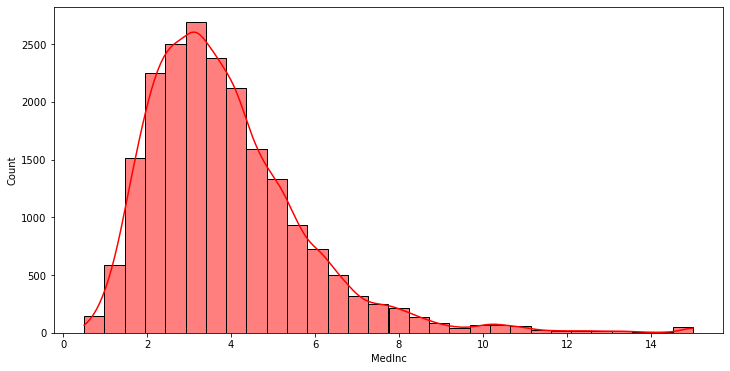

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))

sns.histplot(data['MedInc'],bins = 30, kde=True, color='red') #분포 그림

In [12]:
from scipy.stats import skew, kurtosis 

medinc_skewness = skew(data['MedInc'])
medinc_kurtosis = kurtosis(data['MedInc'])

print(medinc_skewness)
print(medinc_kurtosis)

1.64653702990008
4.951033760409659


In [13]:
## 평균으로 대치

data_mean_imputed = data_missing.copy()
mean_value = data_mean_imputed['MedInc'].mean()
data_mean_imputed['MedInc'] = data_mean_imputed['MedInc'].fillna(mean_value)


# 0값으로 대치 

data_zero_imputed = data_missing.copy()
data_zero_imputed['MedInc'] = data_zero_imputed['MedInc'].fillna(0)


# 보간법 (선형보간)

data_linear_interpolated = data_missing.copy()
data_linear_interpolated['MedInc'] = data_linear_interpolated['MedInc'].interpolate()

In [14]:
def plot_comp(original, imputed, method):
    plt.figure(figsize=(10,6))
    plt.plot(original.index, original['MedInc'],'o', label='Original', alpha=0.3)
    plt.plot(imputed.index, imputed['MedInc'],'o', label=f'Imputed ({method})', alpha=0.3)
    plt.xlabel('Index')
    plt.ylabel('MedInc')
    plt.legend()
    plt.show()

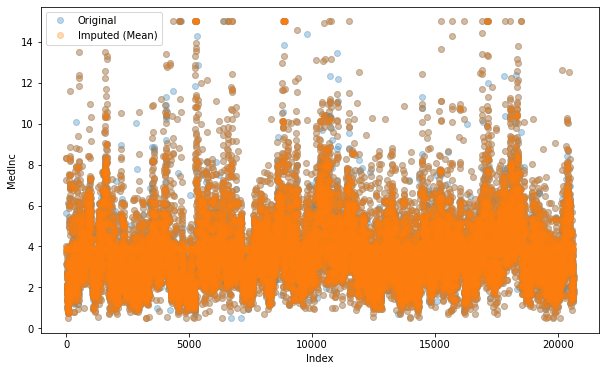

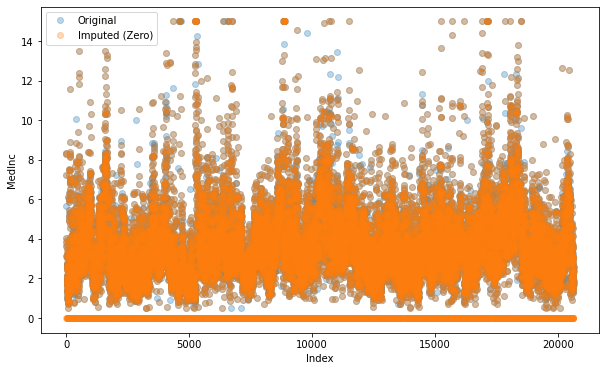

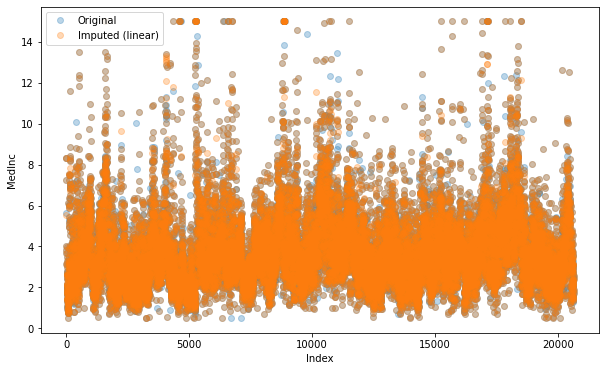

In [15]:
plot_comp(data, data_mean_imputed, 'Mean')
plot_comp(data, data_zero_imputed, 'Zero')
plot_comp(data, data_linear_interpolated, 'linear')

In [16]:
## 실제 성능을 비교해 보자!

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 결측치를 보간-> 결측치를 보간한 데이터 1.평균, 2.0 3.보간법  3가지 방법으로 결측치를 대치한 데이터로 선형회귀 분석을 진행해서 
## 성능이 얼마나 나오는지 확인 ?
## e.g. 10 개 10 개 10개 -> 7:3 으로 각각 나눠서 7로 train, 3으로 평가한다 
## 이 데이터셋으로 학습해서 데이터를 예측해서 평가한다.

## 우리가 사용하는 방식은 아래와 같다.
## y값은 기존에 존재 , 우리가 결측치를 대치하여 만든 데이터로 예측한 값이랑 비교 
# 회귀분석을 통해서 MSE 측정할 것

def per_reg(data, label):
    X= data[['MedInc']]
    y = data['MedHouseVal']
    
    reg = LinearRegression().fit(X,y)
    y_pred = reg.predict(X)
    mse = mean_squared_error(y, y_pred)
    
    return y_pred, mse, reg.coef_[0], reg.intercept_  #예측값, MSE, 계수, 상수들 확인

In [17]:
y_pred_mean, mse_mean, coef_mean, intercept_mean = per_reg(data_mean_imputed, 'Mean Imputation')
y_pred_zero, mse_zero, coef_zero, intercept_zero = per_reg(data_zero_imputed, 'Zero Imputation')
y_pred_linear, mse_linear, coef_linear, intercept_linear = per_reg(data_linear_interpolated, 'linear Imputation')

In [18]:
#성과 출력
#MSE가 가장 낮아야 성능이 좋다라고 본다.
# 실제값과 - 예측값 = 차이 어떤 게 가장 적냐? 성능을 평가한다.
# 5 - 예측값이 4 = 1
# 5 - 예측값 3 = 2 
# 1과 2중에서 1이 더 잘 맞았다.
# 예측값- 실제값 = 잔차 

print(f'Mean Imputation -MSE: {mse_mean}')
print(f'zero Imputation -MSE: {mse_zero}')
print(f'Linear Imputation -MSE: {mse_linear}')

Mean Imputation -MSE: 0.7614520509063426
zero Imputation -MSE: 0.9296910233890502
Linear Imputation -MSE: 0.7042327660288281


In [19]:
# 시각화
def plot_comp(original, imputed, y_pred, coef, intercept, method):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='MedInc',y='MedHouseVal', data = original, label='Actual Values', alpha=0.3, color='blue')
    sns.scatterplot(x='MedInc',y='MedHouseVal', data = imputed, label=f'Imputed ({method})', alpha=0.3, color='red')
    plt.plot(imputed['MedInc'], y_pred, 'o', color = 'green',label= 'Predicted Values', alpha=0.3)
    plt.plot(imputed['MedInc'], coef * imputed['MedInc']+intercept, color = 'orange',label= 'Regression Line')
    plt.xlabel('MedInc')
    plt.ylabel('MedHouseVal')
    plt.legend()
    plt.show()

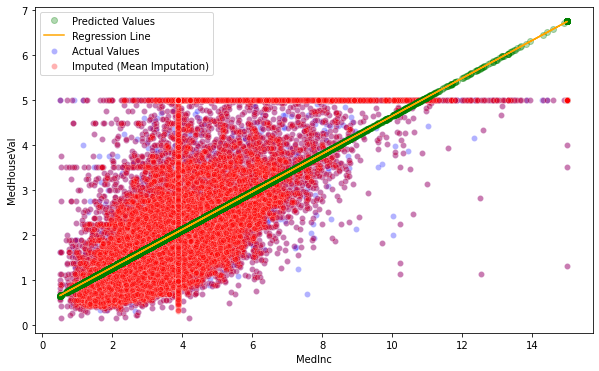

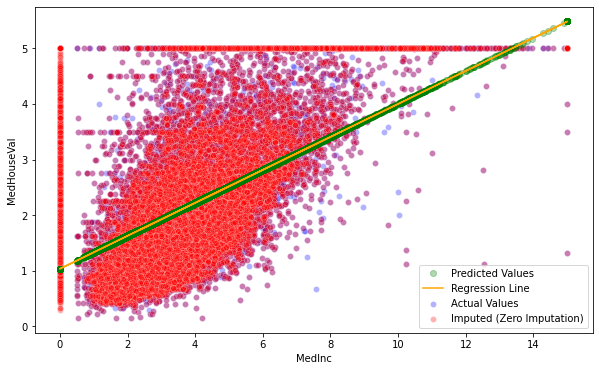

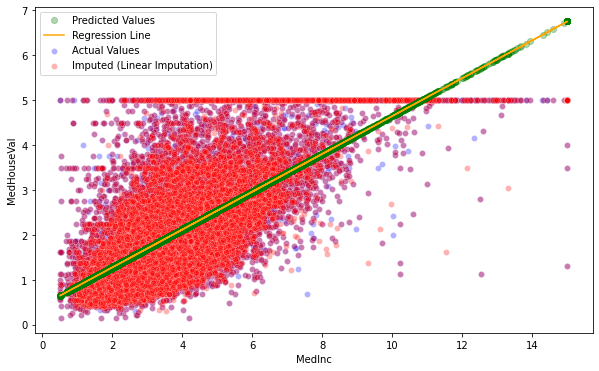

In [20]:
plot_comp(data, data_mean_imputed, y_pred_mean, coef_mean, intercept_mean, 'Mean Imputation')
plot_comp(data, data_zero_imputed, y_pred_zero, coef_zero, intercept_zero, 'Zero Imputation')
plot_comp(data, data_linear_interpolated, y_pred_linear, coef_linear, intercept_linear, 'Linear Imputation')

In [21]:
data

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [22]:
len(y_pred_mean)

20640

In [23]:
mse_mean

0.7614520509063426

In [24]:
coef_mean

0.4207023330222069

In [25]:
intercept_mean

0.43924718782546424

In [26]:
data_mean_imputed

,MedInc,MedHouseVal
0,8.325200,4.526
1,8.301400,3.585
2,7.257400,3.521
3,3.872836,3.413
4,3.846200,3.422
...,...,...
20635,3.872836,0.781
20636,2.556800,0.771
20637,1.700000,0.923
20638,1.867200,0.847


In [27]:
data_mean_imputed

,MedInc,MedHouseVal
0,8.325200,4.526
1,8.301400,3.585
2,7.257400,3.521
3,3.872836,3.413
4,3.846200,3.422
...,...,...
20635,3.872836,0.781
20636,2.556800,0.771
20637,1.700000,0.923
20638,1.867200,0.847
